# 大綱介紹
這次作業是個人原創實作Hash Table
我會在下方介紹hash table所需要的2個元素

＃1.雜湊函數

＃2.雜湊表


首先,我簡單介紹:Hash Function 

# Hash function原理


雜湊函數：函數的功能是將輸入的數據轉為固定長度不規則的值(視為數據摘要)
輸入的數據：不定長度資料或訊息
輸出的資料：16進位的編碼 
#規則1：無法由16進位的編碼回推回去原本輸入的資料
#規則2：輸出的16進位編碼,是無論輸入的資料長短都會得到相同的長度


最後要將經過MD5得到的64位元資料，對我的陣列長度取餘數,以當做該資料存放在陣列裡面的位置
ex.key 為 dog 經過MD5 -> (9097202055026264535080901219663267845)

假設陣列長度為：64

接著再將得到的編碼對我的陣列長度取mod,得到5 


所以就將   ('dog',value)     放在Hash Table 的第五個位置。





# MD5詳細原理



＃1.加上附加位元,

＃2.加上64bits長度欄位，內容表示原訊息長度，以位元為單位,長度超過2的64次方
    則以64位元的資料為主
    
＃3.每512bits為單位將訊息切分為L區塊

＃4.依序將第一個區塊與起始向量輸入到MD5演算法當中,輸出為128bits,
    將輸出的再當作輸入到下一個區塊的向量,最後將倒數第二個的輸出值與最後區塊經由
    MD5演算後的輸出值 ,就是該訊息的摘要。

雜湊函數的種類:MD5/SHA-0/SHA-1/...






# 補充：關於位元的知識



位元(bit, b )是電腦中的單位 也是最小的單位  , 是以0,1,狀態存在  


一般使用8bits 來當作一個單元 合稱位元組(Byte ,B )



參考資料：http://www.tcgs.tc.edu.tw/~sagit/info/p3.htm
1Byte=8bits

1KB = 1024 Bytes
1MB = 1024KB 
1GB = 1024MB
1TB = 1024GB
1PB = 1024TB

輸入得文字在電腦中是用0,1,的方式來儲存的,這些文字在電腦中也是轉換成一連串的0和1

對應成一連串的0,1,數字我們可以稱之為編碼,常見有ASCII ,這個編碼使用了8個位元
紀錄大小寫的Ａ-Z 0-9的數字，以及一些英文標點符號

中文 台灣用 Big-5 

而因為還有其他國語言 像是日文韓文 , 所以用 unicode 萬用編碼 方式 編碼 









# 講完hash Function 原理後要接續講資料如何在經由Hash Function處理過後
存放到Hash Table裡面


參考資料：http://www.tsnien.idv.tw/Security_WebBook/%E7%AC%AC%E5%9B%9B%E7%AB%A0%20%E9%9B%9C%E6%B9%8A%E8%88%87%E4%BA%82%E6%95%B8%E6%BC%94%E7%AE%97%E6%B3%95.html
https://zh.wikipedia.org/wiki/%E6%95%A3%E5%88%97%E5%87%BD%E6%95%B8

https://blog.m157q.tw/posts/2017/12/25/differences-between-encryption-and-hashing/

https://ithelp.ithome.com.tw/articles/10208884

https://kknews.cc/zh-tw/tech/jj2egxe.html

http://publish.get.com.tw/BookPre_pdf/51MM321802-1.pdf

https://blog.xuite.net/hsiung03/blog/64164865-%E9%9B%9C%E6%B9%8A%E6%BC%94%E7%AE%97%E6%B3%95

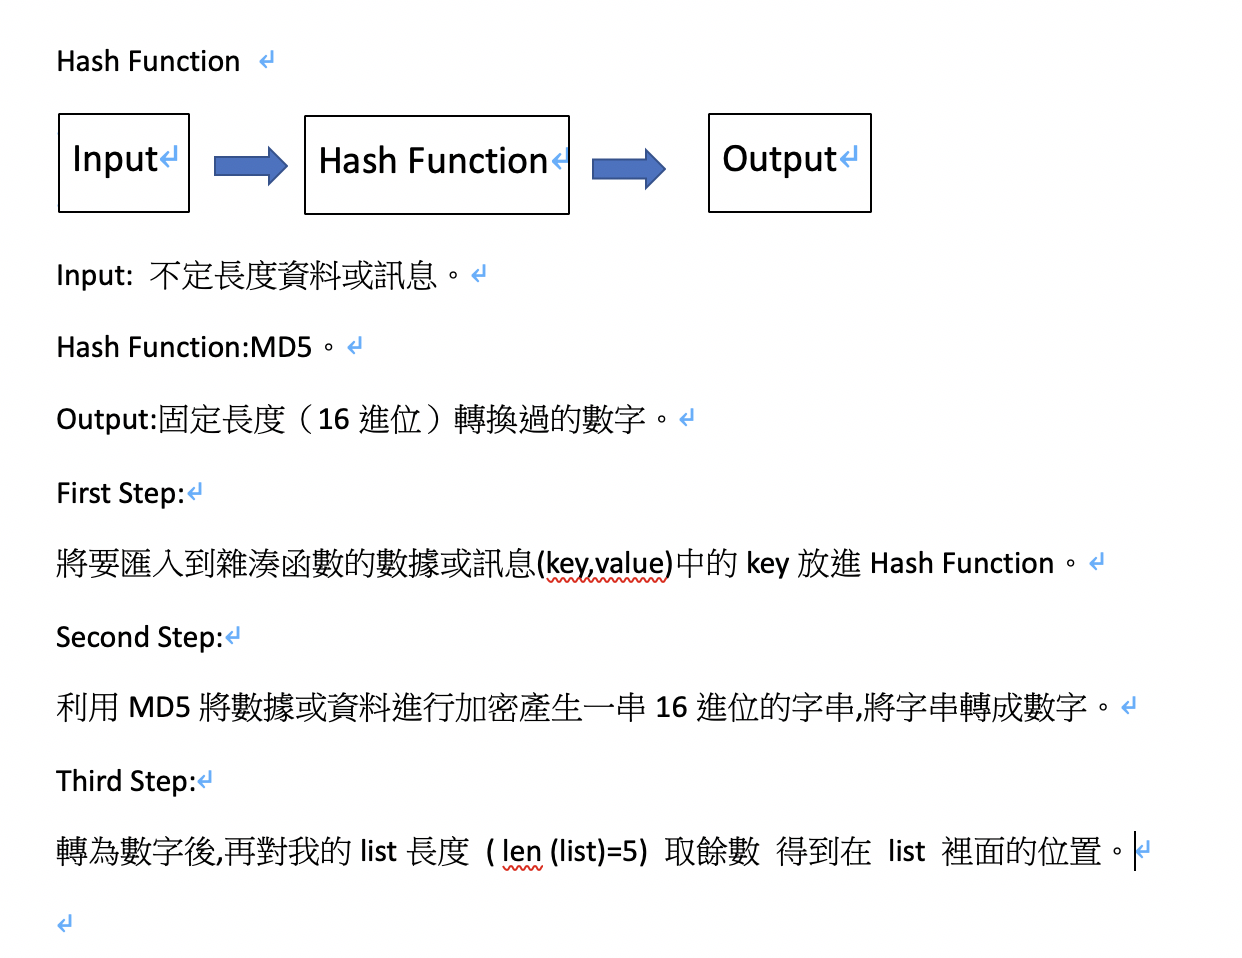

In [338]:
from IPython.display import Image
Image(filename='Hash Function.png')

# 下方的dog經過MD5所得到16進位雜湊值

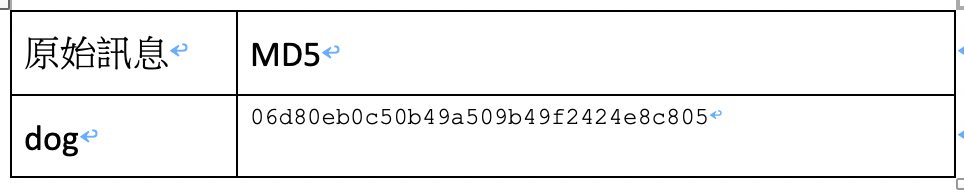

In [321]:
from IPython.display import Image
Image(filename='MD5.png')

參考資料：https://rust-algo.club/collections/hash_map/
https://blog.techbridge.cc/2017/01/21/simple-hash-table-intro/
https://blog.kdchang.cc/2016/09/23/javascript-data-structure-algorithm-dictionary-hash-table/



接續上面的Hash Function我這邊介紹,資料是如何在經過雜湊函數處理過後,存入雜湊表裡面


# Hash Table
 Hash table 原理: 
 
 由來：之所以會有hash Table 是因為以往如果存放資料後要尋找資料的時候，都會花很大量的 
 
 時間,例如 存在array中，要找資料時,就要依序向陣列當中每一個資料值做比較,因此會花費的 
 
 時間複雜度為O(logn),如果是使用已經排序過大小,像是二元搜尋樹,則也要花時間複雜度
 
 O(logn)
 
 因此就發明了一個資料結構,可以存放資料同時可以在O(1)的時間找到資料。
 
 
# Hash Table 就是一個儲存(key,value)的資料結構,
 
# key：是我用來查找我要儲存資料value的標籤
 
# value： 是我要存放在陣列中的資料值

 
規則一:

存入Hash Table的方式，要經過hash function過後 得到一個hash value,便可以知道要存放

在哪一個位置，而如果今天有發生了輸入的值經過 hash 過後 兩筆資料得到相同的 hash value 

,也就是 collision ,這時候 就要將陣列當中的資料以linked list的方式存放在原本存在陣列

裡面的資料後面。 


 
 
 
 
 
# 時間複雜度O
   ＃1. O(1)

  
  
  
# Hash Table 如何儲存資料

1.將要儲存的資料轉換(轉換成雜湊值的hash function是MD5)成雜湊值


2.將雜湊值(取module)轉換成陣列中的index


(再將要放入陣列的(key,value)放在轉換完的index裡面)


3.如果遇到 collosion則將他放在原存在該陣列資料的下一個位置(用linkedlist的形式)



一開始,想先將老師上課講的MD5雜湊演算法,試著跑跑看確認是否可以有跑出雜湊值,一開使發現
跑出來的是16進位的不規則的值,但是這不規則的值(16進位)無法對integer進行mod 取餘數,
所以我將這16進位的轉為integer的資料型態,接著再將該雜湊值，對我的陣列長度,(default=64)取mod 得到5->(為該(key,value)要儲存在陣列裡面的位置）



# 將MD5密碼雜湊函式匯進python並且試著跑跑看dog
   再將跑完的轉為16進位

In [34]:
from Crypto.Hash import MD5
h=MD5.new()
data="dog"
h.update(data.encode('utf-8'))
print (h.hexdigest())
print(int(h.hexdigest(),16))
Key=(int(h.hexdigest(),16))
Key%64

06d80eb0c50b49a509b49f2424e8c805
9097202055026264535080901219663267845


5

In [17]:
import hashlib
m= hashlib.md5()
data='Jeremy'
m.update(data.encode('utf-8'))
h = m.hexdigest()
print(h)

877b13f232fe100743d38e5bcb9a82d3


# Hash table 原理

將資料經過雜湊函數處理過後,建立一個固定長度的陣列,每個陣列裡面都可以存放資料,且每個陣列

裡面的存放資料都是以連結串列的資料結構來存放

每個資料在陣列中存放的位置是在哪:是將經過雜湊函數(將處理過後的16進位數字對陣列長度取餘

數mod，因此而得到一個數字,決定該資料在陣列中存放的位置)處理過後而決定的。





# 加入功能(Add)


### 時間複雜度Big-O:
### best: O(1)
### worst:O(n) a lot of collision

First:將要儲存的資料 先透過MD5轉換成16進位的後再轉成資料型態為int,接著,
再將(轉換完的數字)mod(陣列的大小->預設64)得到=>該node位在陣列中的位置。


Second:接著 進入陣列當中進行判斷:

1.如果array中該index(經過hash function後的值)為空，則要儲存資料(key,value)匯入到該位置

2.如果array中該index(經過hash function後的值)不為空

->代表有collision

->走訪(traversal)將該要足存資料(key,value)連接到self.next為None(也就是沒有下一個

資料存放)的node下方。



# 移除功能(remove)    
### First:
### 將要移除的資料 先透過MD5轉換成16進位的int,接著,再將(轉換完的數字)mod(陣列的大小->預設64)得到=>該node位在陣列中的位置
### Second:

1.如果array當中該index(經過hash function後的值)為空，代表沒有這個值 ，回傳 None


2.如果array當中該index(經過hash function後的值)不為空且該位置的值與我要移除的節點的值相同的話,將上一個list node的pointer指向要移除的節點的下一個listnode 代表移除 

如果沒有上一個listnode的話 將該node的值改為None

Third:

1.如果該index(經過hash function後的值)不為空但是該位置的值不等於我要找的值,那麼， 就


像listnode的走訪一樣, 一個一個確認該listnode的值是否與我要移除的值相同


2.如果走訪過程發現與該欲移除節點相同的值的時候,便將該listnode上一個listnode的pointer


指向要刪除節點的下一個位置,代表移除，並回傳None


 
# 尋找功能(contain)
First:

將要移除的資料 先透過MD5轉換成16進位的int,接著,再將(轉換完的數字)mod(陣列的大小->預設64)得到=>該node位在陣列中的位置
Second:

1.如果該位置為空則代表沒有這個值 則回傳False

2.如果該位置不為空且該位置的值與我要移除的節點的值相同的話 則回傳True

Third:

1.如果該位置不為空但是該位置的值不等於我要找的值,那麼 就要像listnode的走訪一樣, 一個一

個確認該listnode的值是否與我要移除的值相同


2.如果走訪過程發現與該欲移除節點相同的值的時候, 則回傳True


3.如果走訪過程沒有發現與該欲移除節點相同的值的時候, 則回傳False


參考資料：
https://www.csie.ntu.edu.tw/~hsinmu/courses/_media/dsa_12spring/hashing.pdf





# ADD 功能

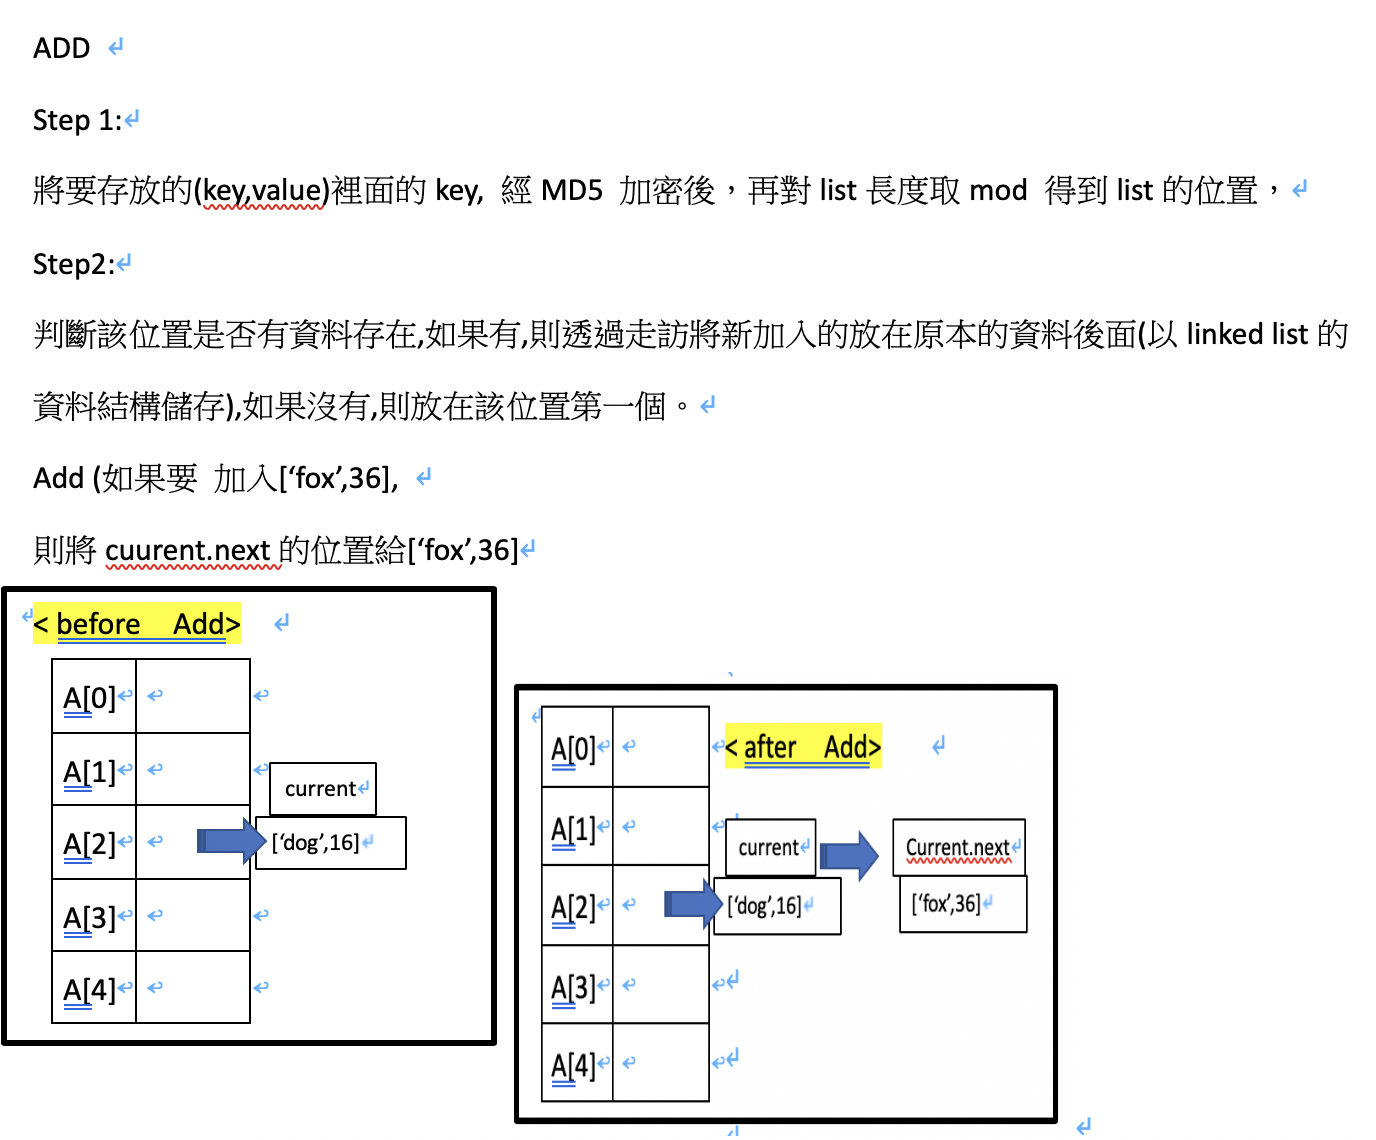

In [339]:
from IPython.display import Image
Image(filename='ADD.png')

# Remove 功能

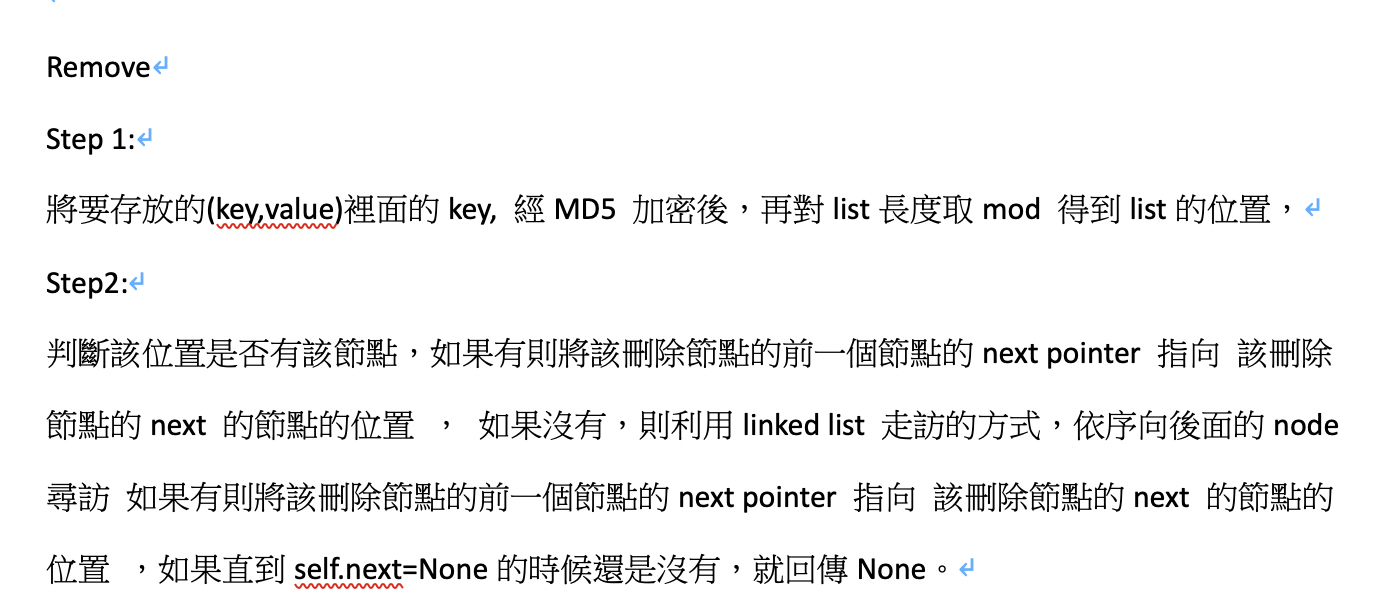

In [341]:
from IPython.display import Image
Image(filename='Remove Theory.png')

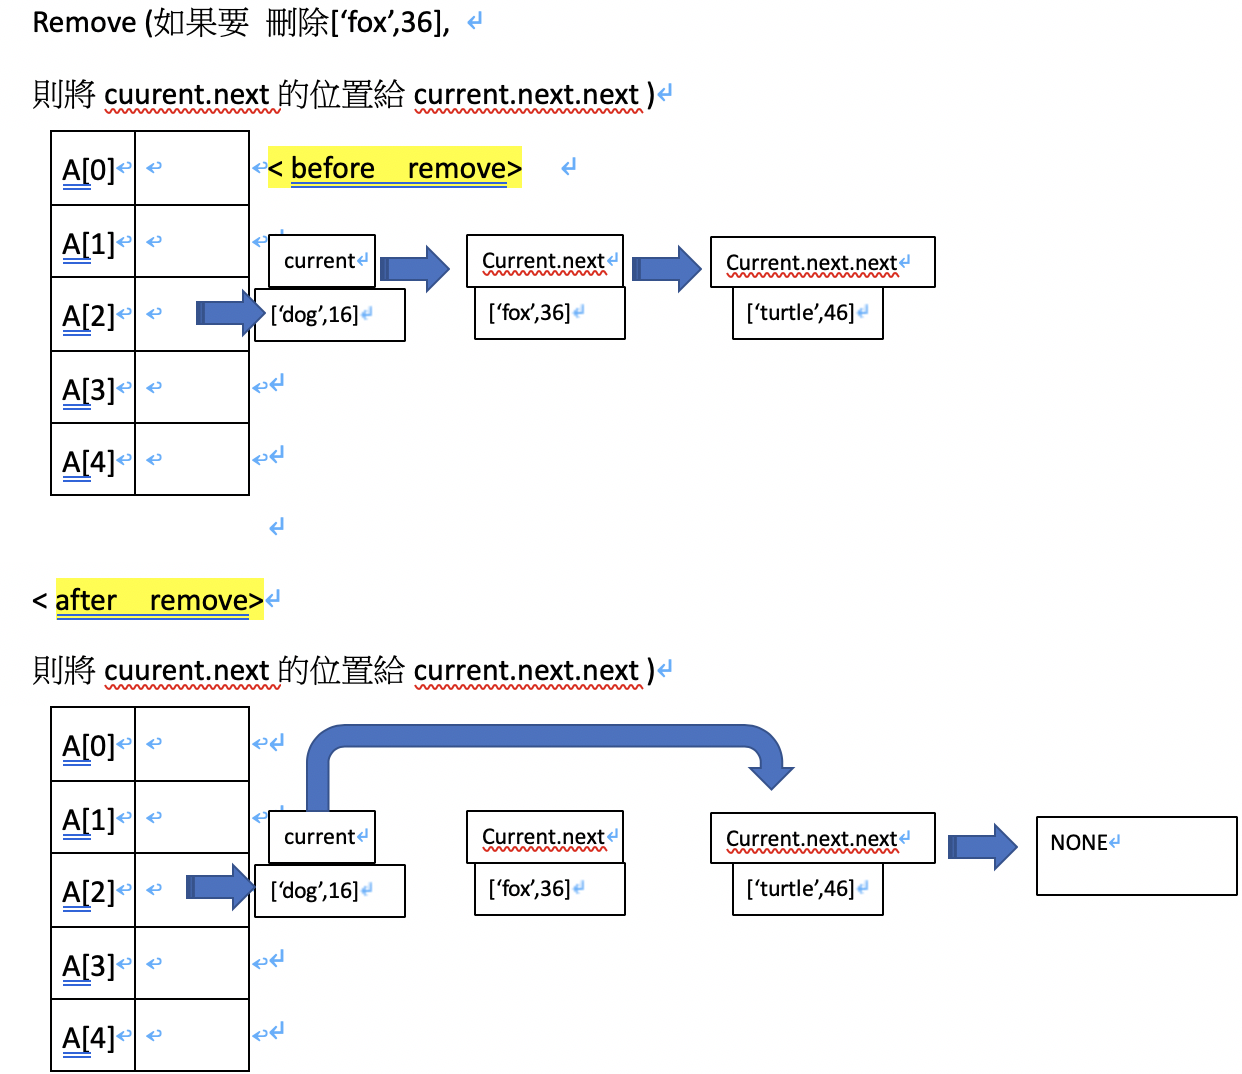

In [340]:
from IPython.display import Image
Image(filename='remove.png')

# Contain 功能

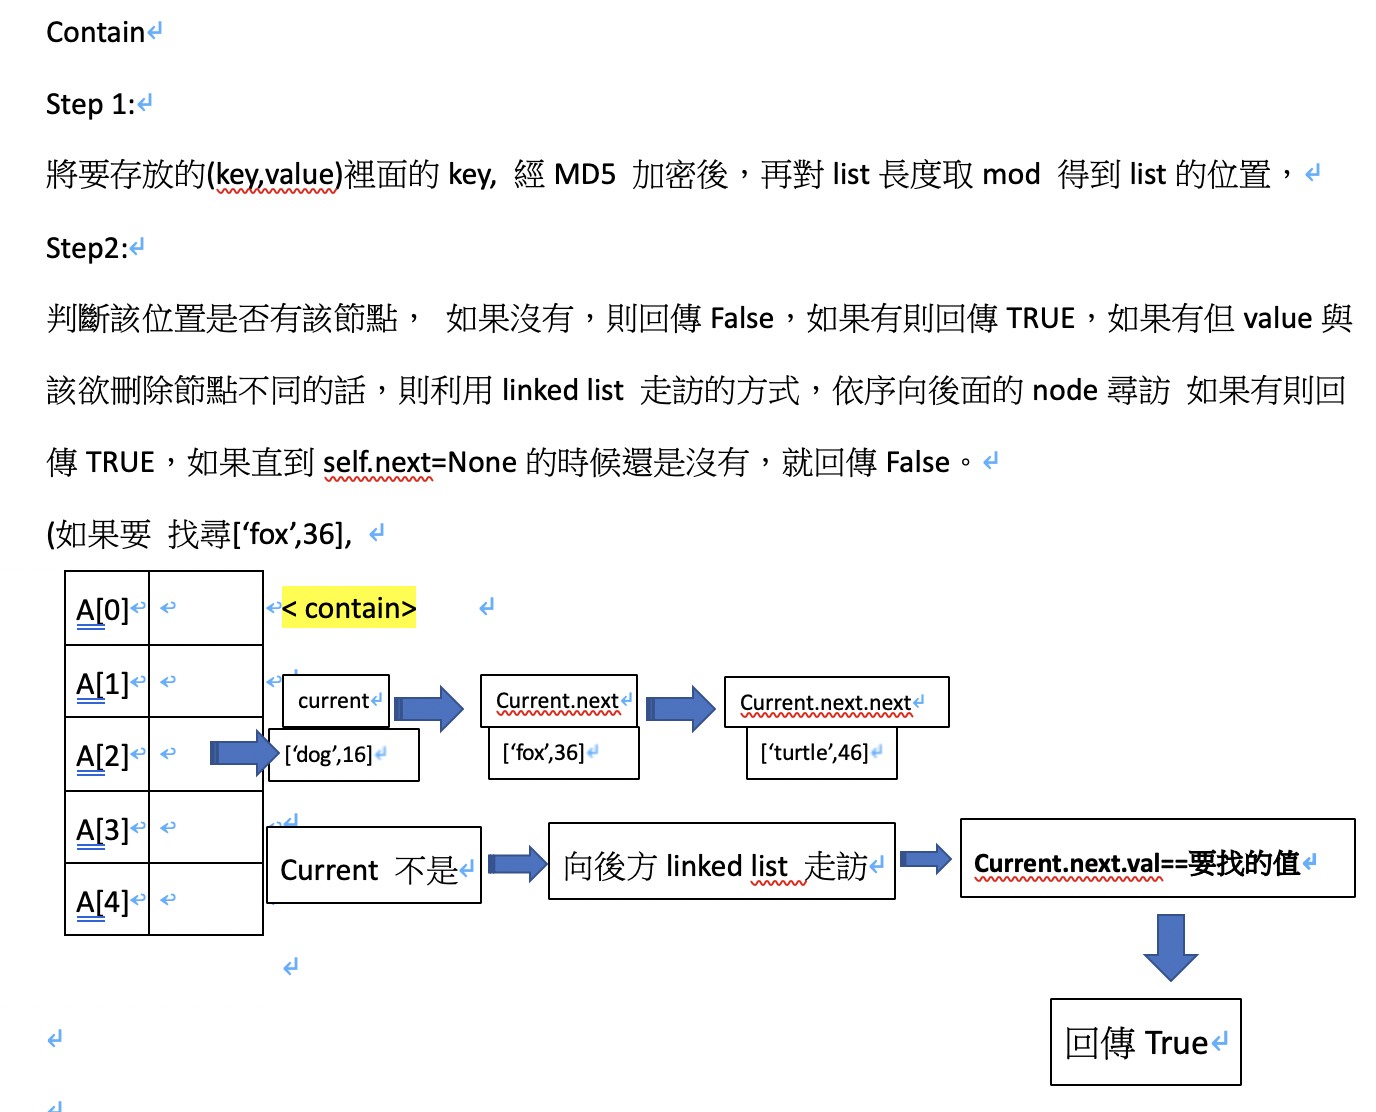

In [342]:
from IPython.display import Image
Image(filename='Contain.png')

# 接著,是我的程式碼：

In [323]:
class ListNode:
    def __init__(self, val):
        self.val = val
        self.next = None
        
        """
        :type val: int
        :type next: ListNode
        :rtype: None        
        """
class MyHashSet:
    def __init__(self,capacity=5):
        self.capacity = capacity
        self.data = [None] * capacity
        
        """
        :type capacity: int
        :rtype: None
        """
        
    def add(self, key):
        """
        :type key: str
        :rtype: None
        """
        
        h=MD5.new()
        data=key
        h.update(data.encode('utf-8'))
        #print (h.hexdigest())
        #print(int(h.hexdigest(),16))
        Key=(int(h.hexdigest(),16))
        #print(Key)
        i=Key%self.capacity
        #print(i)
        if self.data[i] is None:
            
                    
            self.data[i]=ListNode([key])
             
        else:
            #如果self.data[i]有值的話,先將self.data[i].next匯入node,當self.data[i].next非None
            
            node=self.data[i]
            while node:
                
                node=node.next
                
            else:
                node=ListNode([key])
                return
                 
                #self.data[i].next=ListNode([key])
            #else:
                #continue
            
            #self.data[i].next=ListNode([key])
            #for _ in self.data[i]:
                #if self.next==None:
                    #self.next=ListNode([key])
                
                
    def remove(self, key):
        """
        :type key: str
        :rtype: None
        """
        
        h=MD5.new()
        data=key
        h.update(data.encode('utf-8'))
        #print (h.hexdigest())
        #print(int(h.hexdigest(),16))
        Key=(int(h.hexdigest(),16))
        #print(Key)
        i=Key%self.capacity
        #print(i)
        #if self.data[i] is None:
         #   return 
        #else:
            #node=self.data[i]
            #while node:
                
                #if node.val==[key]:

                    #node.val=node.next
                    
                    #print(node.val)
                  #  return 
                
                #node=node.next
                #print(self.data[i])
            #else:
             #   return 
        if self.data[i]:
            if self.data[i].val==[key]:
                self.data[i]=self.data[i].next
        else:
            node=self.data[i]
            while node.next:
                if node.next.val==[key]:
                    node.next=node.next.next
                    return
                node.next=node.next.next
            else:
                return
                    
             
        #print(self.data[i].val)
            
                
           # else:
            #    if 
             #   node=ListNode([key])
            
            #for i in range(0,len(self.data[i])):
             #   if self.data[i][i][0]==key:
              #      self.data[i].pop(i)
               #     return 
    def contains(self, key):
        """
        :type key: str
        :rtype: bool(True or False)
        """
        h=MD5.new()
        data=key
        h.update(data.encode('utf-8'))
        #print (h.hexdigest())
        #print(int(h.hexdigest(),16))
        Key=(int(h.hexdigest(),16))
        #print(Key)
        i=Key%self.capacity
        #print(i)
        #print(self.data[i].val)
        #print([key])
        if self.data[i]:
            node=self.data[i]
            while node:
                
                if node.val==[key]:
                    #print(node.val)
                    return True
                node=node.next
            else:
                return False
                #elif node.val!=[key]:
                 #   while node.next!=None:
                  #      if node.next.val==[key]:
                   #         return True
                    #    else:
                     #       node=node.next
                        
                            
                    #else:
                     #   return False
                #else:
                 #   node=node.next
            
        else:
            return False
     
        
        
        
        
        

In [324]:
hashSet = MyHashSet()
hashSet.add('dog')
hashSet.add('pig')
rel = hashSet.contains('pig')
print(rel)
rel = hashSet.contains('dog')
print(rel)
rel = hashSet.contains('cat')
print(rel)
hashSet.add('bird')
rel = hashSet.contains('bird')
print(rel)
hashSet.remove('pig')
rel = hashSet.contains('pig')
print(rel)

True
True
False
True
False


# 練習while迴圈 確認自己認知while運用是對的

In [298]:
num=5
while num>0:
    num=num-2
    print(num)
num   

3
1
-1


-1

# 自己設立的小的Hash Table 驗證自己得邏輯正確與否

In [267]:
data_structure=[None] * 64

In [282]:
data_structure[0]=ListNode(['Hk'])

In [270]:
data_structure[0].val

['Hk']

In [271]:
data_structure[0]=data_structure[0].next

In [276]:
print(data_structure[0])

None


In [283]:
temp=data_structure[0]

while temp.next:False
    temp=temp.next
else:True
    print(False)


False


In [293]:
if temp.next:
    
    print(T)

In [288]:
if  data_structure[0].next:
    data_structure[0]=data_structure[0].next
    print(True)
else:
    print(False)
    

False


# 最後為我做出來的Hash Table

In [335]:
class ListNode:
    def __init__(self, val):
        self.val = val
        self.next = None
        
        """
        :type val: int
        :type next: ListNode
        :rtype: None        
        """
class MyHashSet:
    def __init__(self,capacity=5):
        self.capacity = capacity
        self.data = [None] * capacity
        
        """
        :type capacity: int
        :rtype: None
        """
        
    def add(self, key):
        """
        :type key: str
        :rtype: None
        """
        
        h=MD5.new()
        data=key
        h.update(data.encode('utf-8'))
      
        Key=(int(h.hexdigest(),16))
        
        i=Key%self.capacity
        #print(i)
        if self.data[i] is None:
            
                    
            self.data[i]=ListNode([key])
            return 
             
        else:
           
            
            node=self.data[i]
            while node:
                
                node=node.next
                
            else:
                node=ListNode([key])
                return
                 
               
                
                
    def remove(self, key):
        """
        :type key: str
        :rtype: None
        """
        
        h=MD5.new()
        data=key
        h.update(data.encode('utf-8'))
        
        Key=(int(h.hexdigest(),16))
        
        i=Key%self.capacity
      
         
        if self.data[i]:
            if self.data[i].val==[key]:
                self.data[i]=self.data[i].next
                return
        else:
            node=self.data[i]
            while node.next:
                if node.next.val==[key]:
                    node.next=node.next.next
                    return
                node.next=node.next.next
            else:
                return
                    
             
      
    def contains(self, key):
        """
        :type key: str
        :rtype: bool(True or False)
        """
        h=MD5.new()
        data=key
        h.update(data.encode('utf-8'))
        
        Key=(int(h.hexdigest(),16))
        
        i=Key%self.capacity
        
        if self.data[i]:
            node=self.data[i]
            while node:
                
                if node.val==[key]:
                    
                    return True
                node=node.next
            else:
                return False
               
        else:
            return False
     
        
        

In [336]:
hashSet = MyHashSet()
hashSet.add('dog')
hashSet.add('pig')
rel = hashSet.contains('pig')
print(rel)
rel = hashSet.contains('dog')
print(rel)
rel = hashSet.contains('cat')
print(rel)
hashSet.add('bird')
rel = hashSet.contains('bird')
print(rel)
hashSet.remove('pig')
rel = hashSet.contains('pig')
print(rel)

True
True
False
True
False


# 結尾：
很開心自己寫出來了,過程中，不斷的上網找資料,也一直遇到bug,所以常常都花很久時間解,
不過最後有成功完成,很開心，希望下次也可以這麼順利。